Mengunakan env anaconda

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
df1 = pd.read_csv('bensin2.csv')
df1

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
...,...,...,...,...,...,...,...
59,31,3,0,50,3000,30,203
60,37,1,0,50,3000,22,241
61,23,2,10,50,3000,30,142
62,36,2,0,50,3000,20,241


# Liner Regression

## cleaning data

In [21]:
df1.describe()

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
count,64.000000,64.000000,64.000000,64.000,64.000000,64.000000
mean,26.640625,2.406250,8.593750,49.875,28.812500,181.312500
std,7.314624,1.560614,13.197786,1.000,3.351735,50.082115
min,6.000000,1.000000,0.000000,42.000,18.000000,32.000000
25%,23.000000,1.000000,0.000000,50.000,29.000000,147.000000
50%,25.000000,2.000000,0.000000,50.000,30.000000,177.000000
75%,30.000000,4.000000,15.000000,50.000,30.000000,212.000000
max,45.000000,6.000000,60.000000,50.000,36.000000,278.000000


In [22]:
df1.count()

Liter        64
Penumpang    64
Bagasi       64
Kecepatan    64
RPM          64
Suhu         64
Kilometer    64
dtype: int64

In [23]:
df1.min()


Liter           6
Penumpang       1
Bagasi          0
Kecepatan      42
RPM          2200
Suhu           18
Kilometer      32
dtype: object

In [24]:
df1.max()

Liter          45
Penumpang       6
Bagasi         60
Kecepatan      50
RPM          4600
Suhu           36
Kilometer     278
dtype: object

In [25]:
df1.shape

(64, 7)

In [26]:
df1.isna().sum()

Liter        0
Penumpang    0
Bagasi       0
Kecepatan    0
RPM          0
Suhu         0
Kilometer    0
dtype: int64

In [27]:
kk = df1[df1['Kilometer'] <= 50] 
kk

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
46,6,2,0,50,3000,30,32


## Memisahkan Training Data dan Test Data

- train_test_split() untuk memisahkan training dataset dan test dataset.
- mengunaan parameter test_size = 0.2 yg artinya 20% dari seluruh isi DataFrame df1 akan dijadikan test dataset.


In [28]:
import numpy as np
import sklearn.model_selection as ms

liter = df1[['Liter']]
kilometer = df1[["Kilometer"]]
X_train, X_test, y_train, y_test = ms.train_test_split(liter,kilometer, test_size = 0.2, random_state=0)
print(X_train.size , X_test.size)

51 13


## Visualisasi

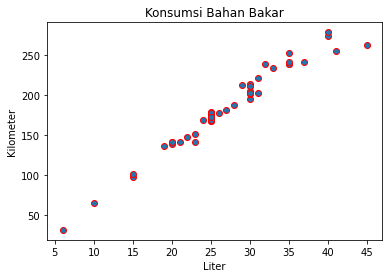

In [29]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

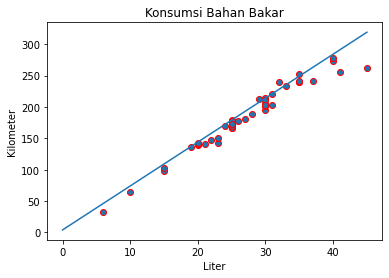

In [30]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1 = np.linspace(0,45)
y1 = 4 + 7 * x1
plt.plot(x1,y1)
plt.show

## Melatih Model

In [31]:
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

code di atas adalah Ordinary Least Square(OLS) utk dpt menetukan a dan b yg tepat biasanya digunakan di bidang statistik.

In [33]:
model1.coef_

array([[6.58504804]])

In [34]:
model1.intercept_

array([6.46820707])

sekarang mengetahui slope dan intercept, sehingga persamaan garis lurus yg kita miliki menjadi y = 6,468 + 6,585x.

<function matplotlib.pyplot.show(close=None, block=None)>

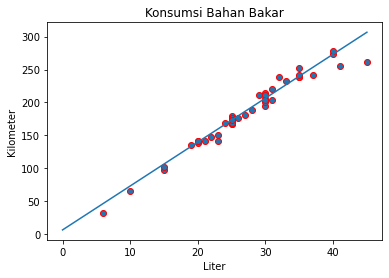

In [35]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1 = np.linspace(0,45)
y1 = 6.46 + 6.67 * x1
plt.plot(x1,y1)
plt.show

## Scoring model

In [36]:
r2 = model1.score(X_test, y_test)
print(r2)

0.9028472177237074


In [37]:
jarak = model1.predict([[60]])
print(jarak)

[[401.57108948]]


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
prediksi = model1.predict(X_test)
print(prediksi)

[[118.41402375]
 [204.01964827]
 [124.99907179]
 [157.92431199]
 [105.24392767]
 [138.16916787]
 [236.94488847]
 [204.01964827]
 [171.09440807]
 [243.52993651]
 [171.09440807]
 [138.16916787]
 [190.84955219]]


In [39]:
print(y_test)

    Kilometer
45         72
29        204
43        143
61        142
34        102
33        144
31        242
40        201
26        175
62        241
22        166
2         144
11        191


# Multiple Liner Regression

tujuannya sama yaitu mencari nilai koefisien slope dan intercept yg menghasilkan tingkat error sekecil mungkin.
dalam multiple liner regression, persamaannya menjadi y = a + bx + bx + bx + ...bx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.model_selection as ms

df2 = pd.read_csv('bensin2.csv')
df2.corr(method='pearson')

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.114934,0.092514,0.115283,0.043823,0.975661
Penumpang,-0.114934,1.000000,0.078270,0.114424,-0.061070,-0.114363
Bagasi,0.092514,0.078270,1.000000,0.082686,-0.056291,0.081485
Kecepatan,0.115283,0.114424,0.082686,1.000000,-0.007104,0.099678
Suhu,0.043823,-0.061070,-0.056291,-0.007104,1.000000,0.032789
Kilometer,0.975661,-0.114363,0.081485,0.099678,0.032789,1.000000


In [2]:
X = df2[['Liter','Penumpang','Suhu','Kecepatan']]
y = df2[['Kilometer']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=0)
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [3]:
print('intercept=', model1.intercept_)
print('slope=', model1.coef_)

intercept= [31.46091016]
slope= [[ 6.57091536 -0.02084605 -0.03329528 -0.47363829]]


### Model

In [8]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
df3 = pd.read_csv('bensin2.csv')
X = df3[['Liter','Penumpang','Suhu','Kecepatan']]
y = df3[['Kilometer']]
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1, random_state=0)
model1.fit(X_train, y_train)

LinearRegression()

In [9]:
print('intercept = ', model1.intercept_)
print('slope = ', model1.coef_)

intercept =  [31.46091016]
slope =  [[ 6.57091536 -0.02084605 -0.03329528 -0.47363829]]


In [10]:
data1 =  np.array([[30,2,10,50]])
hasil = model1.predict(data1)
print(hasil)

[[204.53181167]]


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
